In [ ]:
import os,codecs

In [ ]:
import numpy as np
import tensorflow as tf
from keras.layers import Dropout
from matplotlib import pyplot as plt
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from keras import initializers
from tensorflow.keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from array import array

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# PROVIDE YOUR DIRECTORY WITH THE EXTRACTED FILES HERE
datapath = '/content/drive/MyDrive/Colab Notebooks/SML/SML_A4/mnist/'

files = os.listdir(datapath)

def get_int(b):   # CONVERTS 4 BYTES TO A INT
    return int(codecs.encode(b, 'hex'), 16)

data_dict = {}
for file in files:
    if file.endswith('ubyte'):  # FOR ALL 'ubyte' FILES
        print('Reading ',file)
        with open (datapath+file,'rb') as f:
            data = f.read()
            type = get_int(data[:4])   # 0-3: THE MAGIC NUMBER TO WHETHER IMAGE OR LABEL
            length = get_int(data[4:8])  # 4-7: LENGTH OF THE ARRAY  (DIMENSION 0)
            if (type == 2051):
                category = 'images'
                num_rows = get_int(data[8:12])  # NUMBER OF ROWS  (DIMENSION 1)
                num_cols = get_int(data[12:16])  # NUMBER OF COLUMNS  (DIMENSION 2)
                parsed = np.frombuffer(data,dtype = np.uint8, offset = 16)  # READ THE PIXEL VALUES AS INTEGERS
                parsed = parsed.reshape(length,num_rows,num_cols)  # RESHAPE THE ARRAY AS [NO_OF_SAMPLES x HEIGHT x WIDTH]           
            elif(type == 2049):
                category = 'labels'
                parsed = np.frombuffer(data, dtype=np.uint8, offset=8) # READ THE LABEL VALUES AS INTEGERS
                parsed = parsed.reshape(length)  # RESHAPE THE ARRAY AS [NO_OF_SAMPLES]                           
            if (length==10000):
                set = 'test'
            elif (length==60000):
                set = 'train'
            data_dict[set+'_'+category] = parsed  # SAVE THE NUMPY ARRAY TO A CORRESPONDING KEY

Reading  train-images.idx3-ubyte
Reading  train-labels.idx1-ubyte
Reading  t10k-images.idx3-ubyte
Reading  t10k-labels.idx1-ubyte


In [ ]:
import numpy as np
import tensorflow as tf
from keras.layers import Dropout
from matplotlib import pyplot as plt
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from keras import initializers
from tensorflow.keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from array import array
from keras import layers
from keras.layers import Concatenate

In [ ]:
train_images = data_dict['train_images'].reshape((-1, 784))
test_images = data_dict['test_images'].reshape((-1, 784))
train_labels = data_dict['train_labels']
test_labels = data_dict['test_labels']

CREATING AUTO ENCODER

In [ ]:
modela = Sequential()


# adding the input and first hidden layer
modela.add(Dense(512, input_dim=784, trainable=True, activation='relu', use_bias=True,
                 kernel_initializer=initializers.HeNormal(seed=None)))


#adding the latent
modela.add(Dense(128, use_bias=True, activation="relu"))
#modela.add(BatchNormalization())
#modela.add(Activation("relu"))

#adding the hidden layer
modela.add(Dense(64, use_bias=True, activation="relu"))

#adding the hidden layer
modela.add(Dense(128, use_bias=True, activation="relu"))

#adding the hidden layer
modela.add(Dense(512, use_bias=True, activation="relu"))

#adding the output layer
modela.add(Dense(784, use_bias=True, activation="relu"))

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

modela.compile(
    optimizer=adam,
    loss="mean_squared_error",
    metrics=[tf.keras.metrics.CategoricalCrossentropy()],
)

modela.summary()

In [ ]:
history = modela.fit(
    train_images,
    train_images,
    shuffle=True,
    epochs=31,
    batch_size=512,
    # validation_data=(test_images, test_images)
)

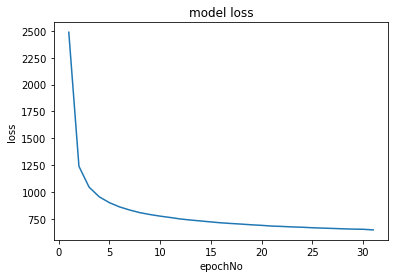

In [ ]:
xpt = [i for i in range(1, 32)]
plt.plot(xpt, history.history['loss'])
plt.xlabel('epochNo')
plt.ylabel('loss')
plt.title('model loss')
plt.show()